<a href="https://colab.research.google.com/github/hersan19/Inteligencia_computacional/blob/main/Ejemplo_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo algoritmo genético para la solución del problema del viajero

Se instala la biblioteca DEAP (Distributed Evolutionary Algorithms in Python).

Para más información acerca de la biblioteca consultar la documentación en el siguiente link.

https://deap.readthedocs.io/en/master/index.html


In [21]:
pip install deap

Se importan las bibliotecas que se utilizarán para este ejemplo

In [23]:
import array
import random
import json
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import numpy as np

# **Funciones**

Para la solución del problema se implementa la función "Euclidian", la cual realiza el cálculo de la distancia entre dos puntos.

Especificamente, se realiza el cáluclo de la distancia euclidiana entre dos coordenadas geográficas.

In [24]:
import math
def Euclidian(X, Y):
    return math.sqrt( (float(X[1])-float(Y[1]))**2 + (float(X[0])-float(Y[0]))**2)
    


Se implementa la función "Distances".

Esta función realiza el cálculo de la distancia total de un ciurcuito al pasar por todas las capitales. 
Es decir, se obtiene el costo total de cada uno de los circuitos o posibles soluciones. 

In [25]:
def Distances(cities):
    r= len(cities)
    M=np.zeros((r,r))
    for i in range(r-1):
        for j in range(i+1, r):
            M[i][j] = Euclidian(cities[i], cities[j])
            M[j][i]= M[i][j]
    return M

Se obtienen las coordenadas geográficas de las capitales de cada uno de los estados de la república mexicana.

Cada ciudad cuenta con los valores de "latitud" y "longitud"

In [26]:
url="https://raw.githubusercontent.com/hersan19/Inteligencia_computacional/main/ciudades.csv"
df_ciudades=pd.read_csv(url)
datas = list(zip(list(df_ciudades.latitud), list(df_ciudades.longitud)))

Creación de diccionario para relacionar el indice con el nombre de la ciudad

In [27]:
diccionario=df_ciudades["ciudad"]
diccionario=diccionario.to_dict()


# Configuración inicial de DEAP

Se implementa el algoritmo completo utilizando la biblioteca DEAP, la cual permite utilizar una representación para la solución del problema.

La representación es la siguiente:

[2, 7, 8, 1, 3, 9, 4, 5, 6, 0]

In [28]:
# Asignaciones de las distancias
distance_map =Distances(datas)
IND_SIZE = len(datas) # Número de ciudades a recorrer

# Se crea la clase "Individual" usando "creator" como herramienta. 
# La clase "Individual" es una arreglo y tiene como atributo "FitnessMin" el cual será su aptitud.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # El parámetro "weights=-1.0" establece que es una minimización 
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)
# Caja de herramientas para inicializar los individuos

# Toolbox.register crea un alias para una función.
toolbox = base.Toolbox()

# Generador de circuitos.
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)  
# El individuo llamado "individual", toma las características de aptitud.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
# La población es el conjunto de "n" individuos.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Se declara la función encargada de evaluar los individuos.
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

# Se configuran los parámetros de cruza, mutación, el método de selección y se agrega al toolbox la función encaraga de evaluar a la población.
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)




/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning:

A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



# Algoritmo general
Se definen los parámetros para el algoritmo genético, así como se agregan elementos al toolbox para guardar las estadísticas del proceso de búsqueda.

In [29]:
def main(): # algoritmo principal
    #random.seed(0)
    # Parámetros del algoritmo genético
    numero_individuos=100
    p_cruza=0.8
    p_mutacion=0.5
    generaciones=100
    # Creación de la población
    pop = toolbox.population(n=numero_individuos)
    # hof (Hall Of Fame) se guarda el mejor individuo que siempre ha existido durante todo el proceso evolutivo
    hof = tools.HallOfFame(1)
    # Se agrega "tools.Statistics" para guardar las estadísticas de las aptitudes del proceso evolutivo
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    # Se configura el algoritmo evolutivo
    pop,log=algorithms.eaSimple(pop, toolbox, p_cruza, p_mutacion, generaciones, stats=stats, 
                        halloffame=hof,verbose=True)
    
    return pop, log,hof

In [30]:
pop,estadisticas,mejor=main()

gen	nevals	avg    	std    	min    	max    
0  	100   	263.373	17.2888	215.668	295.782
1  	96    	255.206	19.3767	205.191	295.059
2  	88    	251.099	19.9748	200.105	298.659
3  	93    	249.728	21.2723	193.883	300.905
4  	95    	247.469	18.2369	199.195	291.569
5  	90    	248.1  	18.6158	212.459	305.061
6  	93    	248.865	20.5636	212.016	295.327
7  	95    	247.538	18.7981	183.804	296.355
8  	89    	244.058	21.8104	183.804	295.862
9  	87    	239.412	21.6697	187.537	297.855
10 	98    	239.586	21.3438	198.504	306.938
11 	92    	234.684	19.9121	185.432	284.109
12 	90    	238.125	21.4754	198.468	300.272
13 	86    	238.099	21.916 	198.468	284.149
14 	89    	237.577	20.3658	198.387	285.731
15 	90    	237.67 	22.275 	176.08 	295.808
16 	89    	234.742	21.426 	176.08 	291.868
17 	94    	229.76 	21.7483	175.925	275.161
18 	94    	233.58 	24.1674	179.523	292.491
19 	91    	232.088	25.8781	186.63 	294.347
20 	89    	227.107	23.5051	172.502	282.91 
21 	90    	224.301	26.8185	171.778	301.372
22 	92    	

Se obtiene el mejor individuo que se encontró en el proceso de búsqueda

In [31]:
mejor[0]


Individual('i', [12, 29, 5, 26, 3, 22, 30, 18, 24, 2, 1, 25, 4, 31, 13, 7, 23, 27, 6, 16, 10, 14, 28, 19, 20, 11, 15, 0, 8, 17, 9, 21])

Se realiza la decodificación del mejor individuo mediante el uso del diccionario previamente definido. 

De esta manera se obtienen los nombres de cada una de las capitales del mejor recorrido encontrado.

In [32]:
recorrido_nombres=[]
aux=0
for ciudad in mejor[0]:  
  recorrido_nombres.append(diccionario.get(ciudad,ciudad))
recorrido_nombres.append(diccionario.get(mejor[0][0]))
recorrido_nombres

['pachuca',
 'xalapa',
 'tuxtlaGtz',
 'villahermosa',
 'campeche',
 'chetumal',
 'merida',
 'monterrey',
 'culiacan',
 'lapaz',
 'mexicalli',
 'hermosillo',
 'chihuahua',
 'zacatecas',
 'guadalajara',
 'colima',
 'Sanluis',
 'cuidadvictoria',
 'Saltillo',
 'cuernavaca',
 'chilpancingo',
 'toluca',
 'tlaxcala',
 'oaxaca',
 'puebla',
 'cdmx',
 'morelia',
 'aguascalientes',
 'victoriaDurango',
 'tepic',
 'guanajuato',
 'queretaro',
 'pachuca']

En este apartado se decodifica el mejor individuo en términos de las coordenadas geograficas de cada una de las capitales, con el fin de obtener colocarlas en el mapa.

In [33]:
recorrido=[]
for i in range(32):
  latitud=df_ciudades.iloc[mejor[0][i]]["latitud"]
  longitud=df_ciudades.iloc[mejor[0][i]]["longitud"]
  recorrido.append((latitud,longitud))

In [34]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()
# Se agregan los puntos que representan la ubicación de las capitales
fig.add_trace(go.Scattergeo(
    #locations = ["Mexico"],
    #locationmode = 'country names',
    lon=df_ciudades["longitud"],
    lat=df_ciudades["latitud"],
    hoverinfo="text",
    hovertext=df_ciudades["ciudad"],
    #text=df_ciudades["ciudad"],
    mode="markers",
    marker = dict(size=2,color='rgb(255,0,0)',line=dict(width=3,color='rgba(68,68,0)'))))

# Ciclo para realizar la unión de los puntos de acuerdo con el mejor individuo 
for i in range(31):
  fig.add_trace(go.Scattergeo(
      lat=[recorrido[i][0],recorrido[i+1][0]],
      lon=[recorrido[i][1],recorrido[i+1][1]],
      mode="lines",
      line=dict(width=1,color="blue"),
  ))
fig.add_trace(go.Scattergeo(
    lat=[recorrido[-1][0],recorrido[0][0]],
    lon=[recorrido[-1][1],recorrido[0][1]],
    mode="lines",
    line=dict(width=1,color="blue"),
  ))

fig.update_layout(title_text="Mejor recorrido",showlegend=True,
                  geo =dict(
                      #showcountries=True,
                      scope="north america",
                      projection_type ='conic equal area',                      
                      showland = True,
                      #landcolor='rgb(243,243,243)',
                      #countrycolor='rgb(204,204,204)',
                  ), width=1800, height=1400)
fig.show()

Se imprimen los resultados obtenidos junto con la gráfica del proceso evolutivo.

En la gráfica se muestran el promedio de aptitud de toda la población (línea azul), la máxima aptitud (línea naranja) y la máxima (línea verde)

Mejor individuo es: Individual('i', [12, 29, 5, 26, 3, 22, 30, 18, 24, 2, 1, 25, 4, 31, 13, 7, 23, 27, 6, 16, 10, 14, 28, 19, 20, 11, 15, 0, 8, 17, 9, 21])
['pachuca', 'xalapa', 'tuxtlaGtz', 'villahermosa', 'campeche', 'chetumal', 'merida', 'monterrey', 'culiacan', 'lapaz', 'mexicalli', 'hermosillo', 'chihuahua', 'zacatecas', 'guadalajara', 'colima', 'Sanluis', 'cuidadvictoria', 'Saltillo', 'cuernavaca', 'chilpancingo', 'toluca', 'tlaxcala', 'oaxaca', 'puebla', 'cdmx', 'morelia', 'aguascalientes', 'victoriaDurango', 'tepic', 'guanajuato', 'queretaro', 'pachuca']
con aptitud de : (112.17549689122224,)


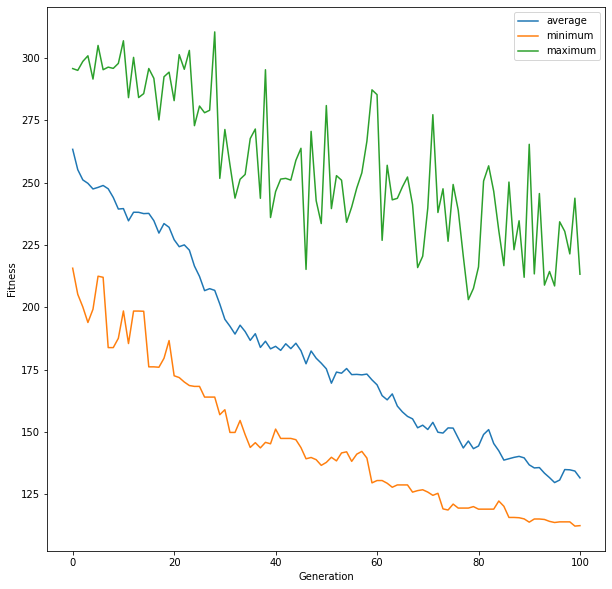

In [35]:
print("Mejor individuo es: %s\n%s\ncon aptitud de : %s" % (mejor[0],recorrido_nombres, mejor[0].fitness))
    
import matplotlib.pyplot as plt
gen, avg, min_, max_ = estadisticas.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper right")


plt.rcParams["figure.figsize"] = (10,10)
plt.show()
